In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import cirq_google

installing cirq...
     |████████████████████████████████| 57 kB 4.4 MB/s 
     |████████████████████████████████| 66 kB 3.1 MB/s 
     |████████████████████████████████| 576 kB 47.2 MB/s 
     |████████████████████████████████| 594 kB 50.2 MB/s 
     |████████████████████████████████| 1.8 MB 51.6 MB/s 
     |████████████████████████████████| 47 kB 5.1 MB/s 
     |████████████████████████████████| 221 kB 56.4 MB/s 
     |████████████████████████████████| 1.0 MB 48.7 MB/s 
     |████████████████████████████████| 44 kB 2.9 MB/s 
     |████████████████████████████████| 229 kB 47.6 MB/s 
     |████████████████████████████████| 147 kB 65.1 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 243 kB 54.8 MB/s 
     |████████████████████████████████| 1.6 MB 44.7 MB/s 
     |█████

In [2]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)


Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


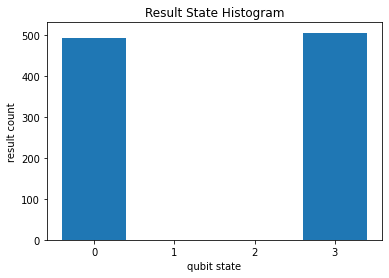

In [3]:
# Visualizing the measurement results using a graphical plot

import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()